<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_12_06_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [ ]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Parse date column and sort
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values('Sampling Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][['Sampling Date', 'RSPM/PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index('Sampling Date').resample('D').mean()

df.head()
city_df.head()

,RSPM/PM10
Sampling Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


from matplotlib import pyplot as plt
_df_8['RSPM/PM10'].plot(kind='hist', bins=20, title='RSPM/PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['RSPM/PM10'].plot(kind='line', figsize=(8, 4), title='RSPM/PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

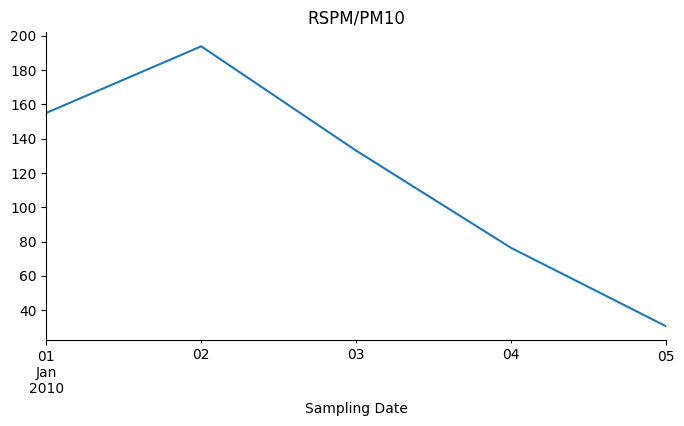

In [ ]:
from matplotlib import pyplot as plt
_df_1['RSPM/PM10'].plot(kind='line', figsize=(8, 4), title='RSPM/PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

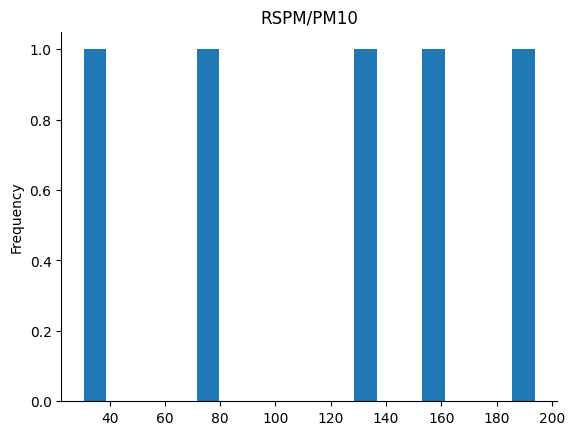

In [ ]:
from matplotlib import pyplot as plt
_df_0['RSPM/PM10'].plot(kind='hist', bins=20, title='RSPM/PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **3.ARIMA Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


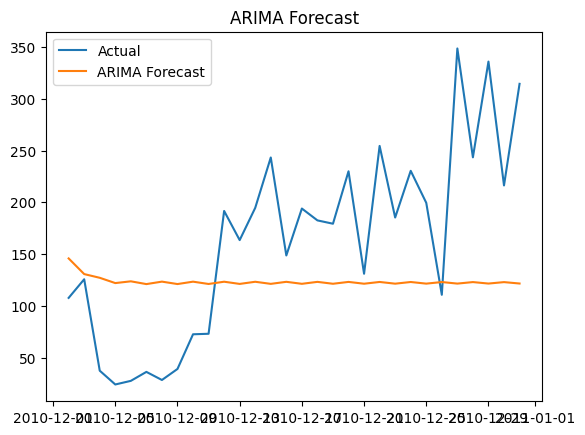

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train, test = city_df[:-30], city_df[-30:]

model = ARIMA(train, order=(3, 1, 3 ))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()